## Dataset exploration

In [84]:
import pandas as pd

df = pd.read_csv("uncleaned.csv")
df.head(10)

,text,label
0,'l è 'l nòm 'd un domìni genèric. Al funsiòun...,0
1,'l è 'l nòm 'd un domìni genèric. Al funsiòun...,0
2,'l è 'l nòm 'd un domìni genèric. Al funsiòun...,0
3,'l è 'l nòm 'd un domìni genèric. Al funsiòun...,0
4,'l è 'l nòm 'd un domìni genèric. Al funsiòun...,0
5,'l è 'l nòm 'd un domìni genèric. Al funsiòun...,0
6,'l è 'l nòm 'd un domìni genèric. Al funsiòun...,0
7,'l è 'l nòm 'd un domìni genèric. Al funsiòun...,0
8,'l è 'l nòm 'd un domìni genèric. Al funsiòun...,0
9,'l è 'l nòm 'd un domìni genèric. Al funsiòun...,0


In [85]:
dial_label = {
    0 : 'EML',
    1 : 'NAP',
    2 : 'PMS',
    3 : 'FUR',
    4 : 'LLD',
    5 : 'LIJ',
    6 : 'LMO',
    7 : 'ROA_TARA',
    8 : 'SCN', 
    9 : 'VEC',
    10 : 'SC'
}

fold_label = {
    'EML' : 0,
    'NAP' : 1,
    'PMS' : 2,
    'FUR' : 3,
    'LLD' : 4,
    'LIJ' : 5,
    'LMO' : 6,
    'ROA_TARA' : 7,
    'SCN' : 8,
    'VEC' : 9,
    'SC' : 10
}

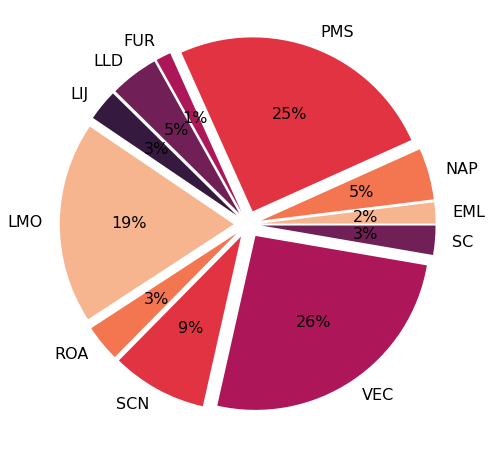

In [86]:
counts = df.groupby('label').count()['text']

import matplotlib.pyplot as plt
import seaborn as sns

labels = [x[:3] for x in fold_label.keys()]
colors = sns.color_palette('rocket_r')[0:11]

plt.figure(figsize=(8,8))

plt.pie(counts, explode=[0.08]*11, labels = labels, colors = colors, autopct='%.0f%%', textprops={'fontsize': 16})
#plt.savefig('figure1.pdf', bbox_inches='tight')
plt.show()

In [87]:
from nltk.tokenize import sent_tokenize
counts = [[0]*11, [0]*11]
for l in range(11):
    texts = df[df['label']==l]['text']
    for t in texts:
        numsen = len(sent_tokenize(t))
        if numsen > 2:
            counts[0][l] += 1
        else:
            counts[1][l] += 1

In [88]:
import numpy as np
counts = np.array(counts)

In [89]:
counts

array([[  700,  2145, 26533,  1781,  1178,  2661, 34556,   720,  8370,
         8656,  4704],
       [ 4474, 10506, 39692,  1900, 10794,  5015, 14946,  8338, 15113,
        59762,  2472]])

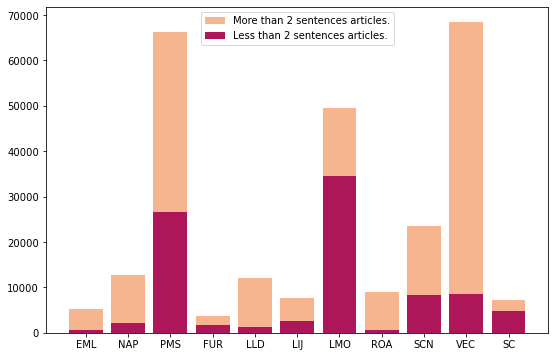

In [90]:
plt.figure(figsize=(9,6))

plt.bar(labels, height=counts[1]+counts[0], label="More than 2 sentences articles.", color=colors[:1])
plt.bar(labels, height=counts[0], label="Less than 2 sentences articles.", color=colors[3:4])

plt.legend(loc='upper center')
#plt.savefig('figure2.pdf', bbox_inches='tight')
plt.show()

## Processed dataset

In [282]:
import pandas as pd

df = pd.read_csv("train.csv")
df

,text,label
0,Al funsiòuna da 'l 11 ed novèmber dal 2016.,0
1,Al 2017 'l è 'n an dal XXI sécol dal Calendàr...,0
2,Siligo i è un comun d'la Sardàggna d' 890 abit...,0
3,Valparaisol’é na cmûna e la capitèl d'l sud d'...,0
4,Queschè 'l è 'n elèinc di povéta ch'i àn scrìt...,0
...,...,...
388776,"A pustis, colat dae sas poesias a sas cummèdias.",10
388777,Sa prima cummèdia sua est Sa rebelliòni de is...,10
388778,In su 2010 l'ant torrada a rapresentare.,10
388779,Sa de duas cummèdia est Sa littra de mariedda...,10


In [283]:
label, count = np.unique(df["label"], return_counts=True)

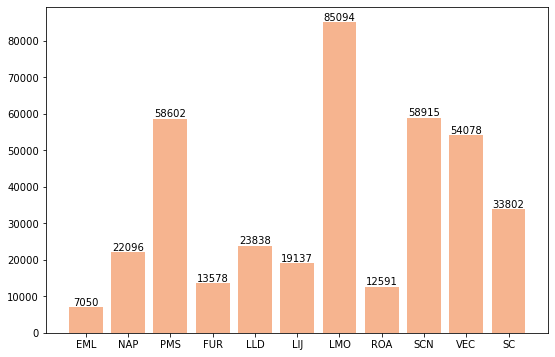

In [284]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = [x[:3] for x in fold_label.keys()]
colors = sns.color_palette('rocket_r')[0:11]

plt.figure(figsize=(9,6))

bars = plt.bar(labels, height=count, color=colors[:1])
plt.bar_label(bars)

plt.show()